In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

In [13]:
class CFG:
    img_dim1 = 15
    img_dim2 = 10
plt.rcParams.update({'figure.figsize': (CFG.img_dim1, CFG.img_dim2)})

In [14]:
DATA_DIR = '/kaggle/input/widsdatathon2023/'

In [15]:
train_data = pd.read_csv(DATA_DIR+'train_data.csv', index_col='index')
train_data.head()

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,31.52,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,31.52,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,31.52,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [16]:
train_data.shape

(375734, 245)

In [17]:
train_data.isnull().sum().sort_values(ascending=False)

nmme0-prate-56w__ccsm30    15934
nmme0-tmp2m-34w__ccsm30    15934
ccsm30                     15934
nmme0-prate-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
                           ...  
ccsm40                         0
cfsv20                         0
gfdlflora0                     0
gfdlflorb0                     0
wind-vwnd-925-2010-20          0
Length: 245, dtype: int64

In [18]:
train_data['startdate'] = pd.to_datetime(train_data['startdate'])

<AxesSubplot:xlabel='startdate', ylabel='contest-tmp2m-14d__tmp2m'>

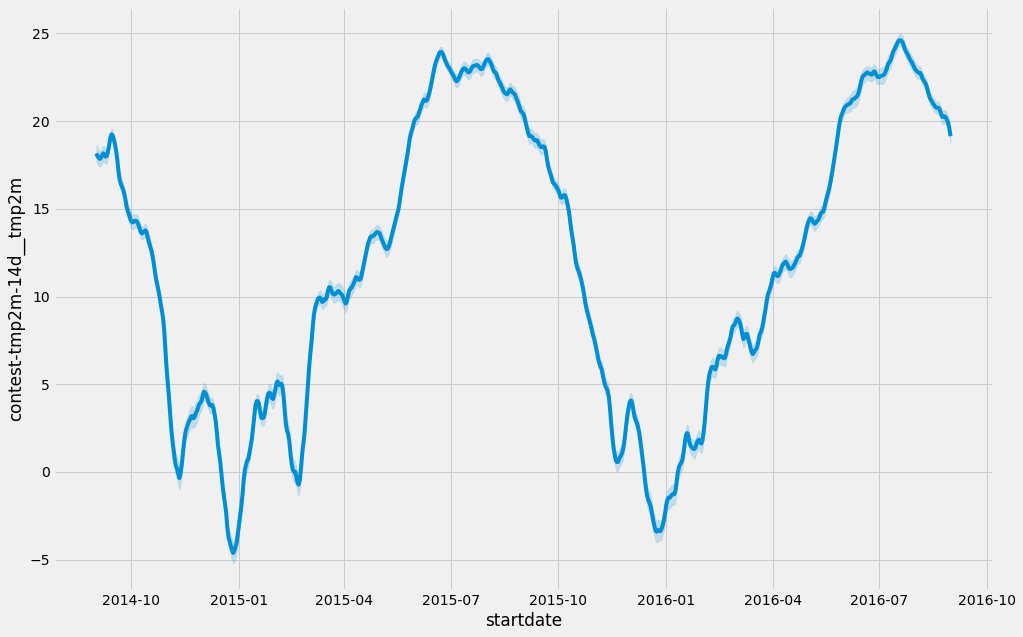

In [19]:
sns.lineplot(data=train_data, x= 'startdate',y='contest-tmp2m-14d__tmp2m')

<AxesSubplot:xlabel='startdate'>

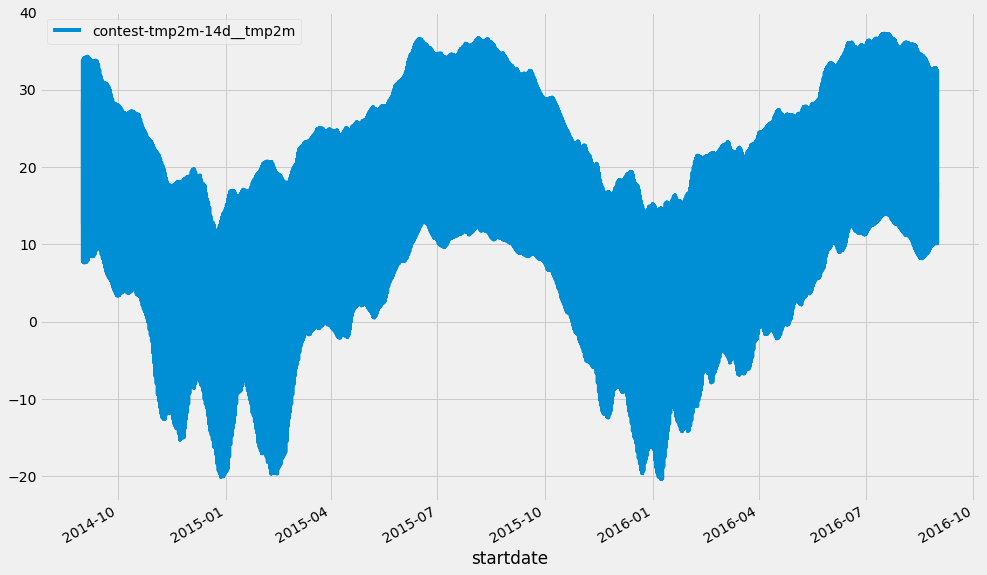

In [51]:
subset_1 = train_data[['startdate','contest-tmp2m-14d__tmp2m']]
subset_1.set_index('startdate', inplace=True)
subset_1.plot()

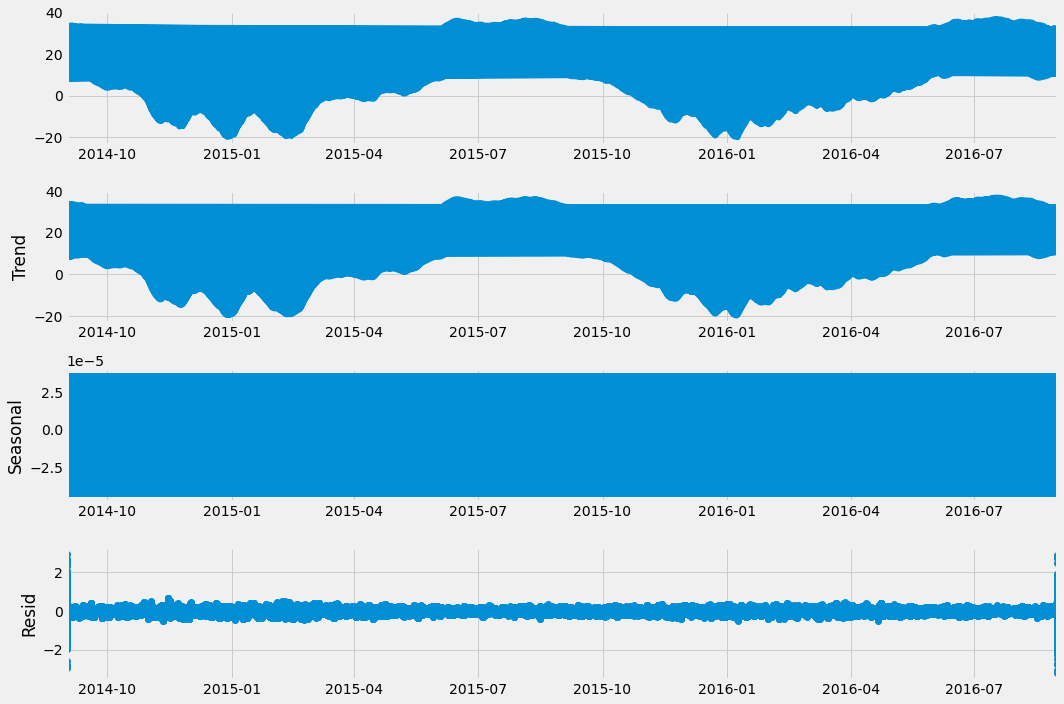

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(subset_1, period=3)
figure = decomposition.plot()
plt.show()

In [22]:
#pip install pmdarima

In [24]:
from random import gauss

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess

from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error


from IPython.display import Image


import warnings
import itertools
import statsmodels.api as sm
from random import gauss
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pmdarima.arima import auto_arima
from pmdarima import pipeline
from pmdarima import model_selection
from pmdarima import preprocessing as ppc
from pmdarima import arima

#from fbprophet import Prophet 


warnings.simplefilter(action='ignore', category= FutureWarning)

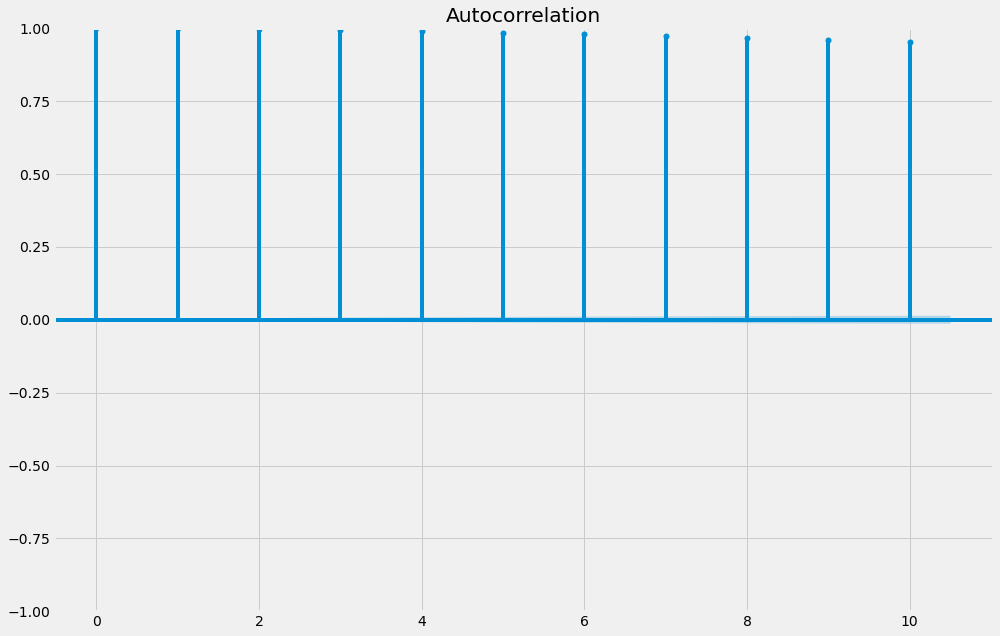

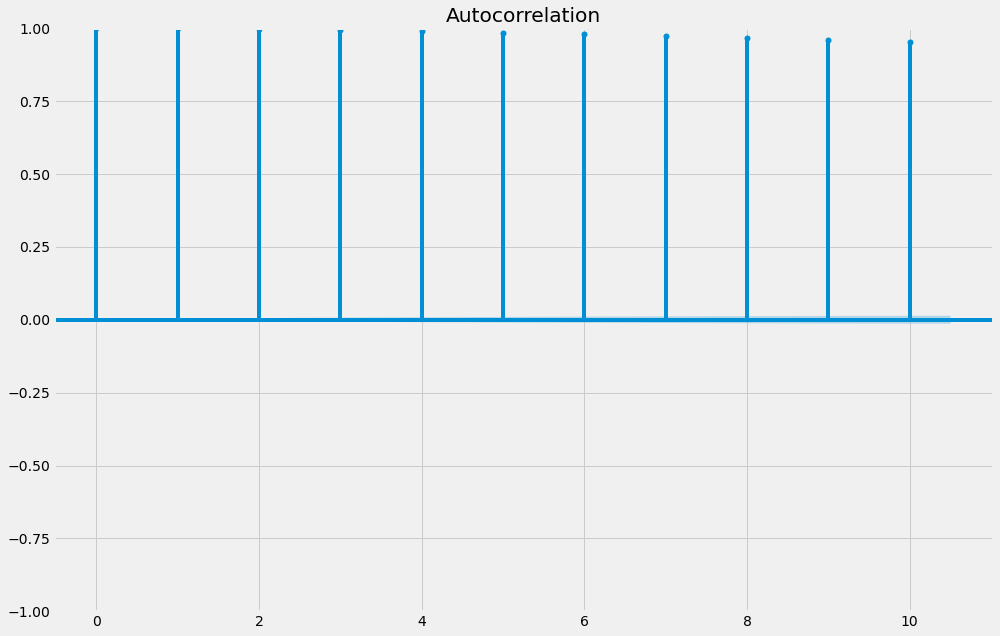

In [26]:
plot_acf(subset_1['contest-tmp2m-14d__tmp2m'], lags = 10)

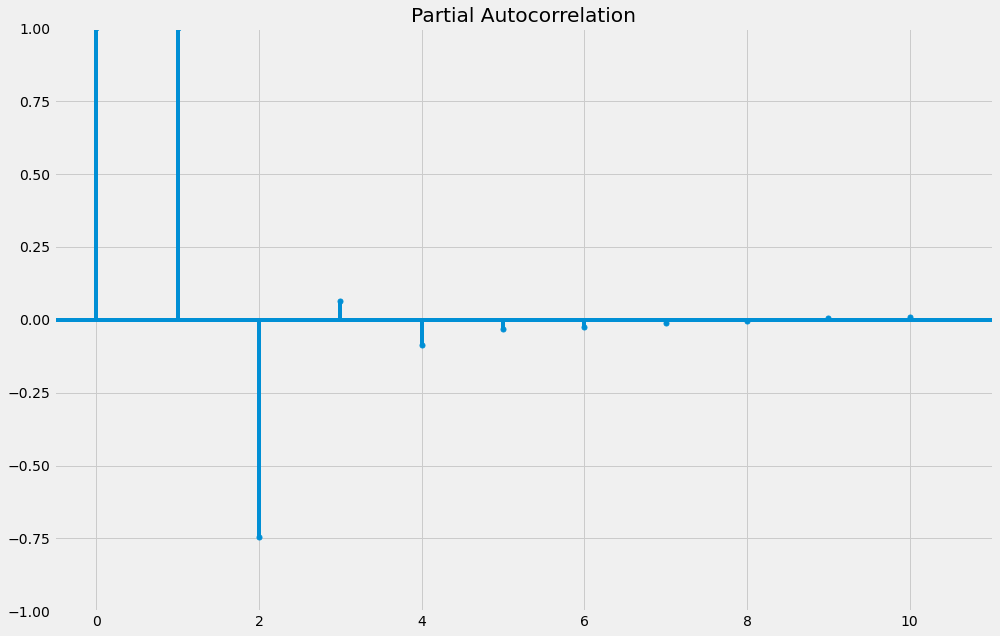

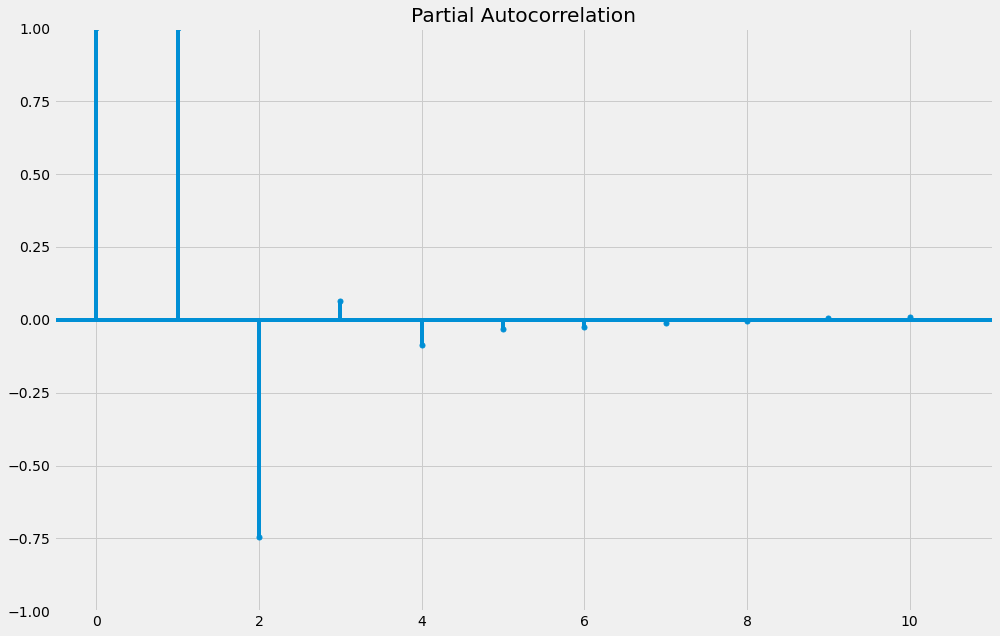

In [27]:
plot_pacf(subset_1['contest-tmp2m-14d__tmp2m'], lags = 10)

gives somewhat strong case for moving average

checking if data is stationary

In [29]:
result = adfuller(subset_1['contest-tmp2m-14d__tmp2m'][100:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -62.002732
p-value: 0.000000
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [55]:
xtrain, xvalid = model_selection.train_test_split(subset_1['contest-tmp2m-14d__tmp2m'], test_size = 12)

In [59]:
df_train = train_data[train_data.startdate < "2015"]

In [60]:
df_valid = train_data[train_data.startdate >= "2015"]

In [61]:
model = auto_arima(df_train['contest-tmp2m-14d__tmp2m'], exogenous=df_train['ccsm40'], trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train['contest-tmp2m-14d__tmp2m'], exogenous=df_train['ccsm40'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=268355.692, Time=16.08 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=268824.708, Time=1.21 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=268547.218, Time=1.49 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=268567.391, Time=3.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=268822.717, Time=0.49 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=268352.926, Time=16.77 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=268479.403, Time=4.86 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=268352.006, Time=12.54 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=268352.982, Time=25.40 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=268454.798, Time=3.98 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=268350.012, Time=2.57 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=268565.398, Time=1.18 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=268545.226, Time=0.62 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=268350.989, Time=4.11 sec
 

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                62708
Model:               SARIMAX(1, 1, 1)   Log Likelihood             -134172.006
Date:                Fri, 17 Feb 2023   AIC                         268350.012
Time:                        02:48:13   BIC                         268377.151
Sample:                             0   HQIC                        268358.425
                              - 62708                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6816      0.053     12.962      0.000       0.579       0.785
ma.L1         -0.6177      0.055    -11.317      0.000      -0.725      -0.511
sigma2         4.2268      0.004   1156.419      0.000       4.220       4.234
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):          40899954.11
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               1.18   Skew:                            10.69
Prob(H) (two-sided):                  0.00   Kurtosis:                       126.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid['ccsm40'])
df_valid["Forecast_ARIMAX"] = forecast

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  data=self.data,
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='index'>

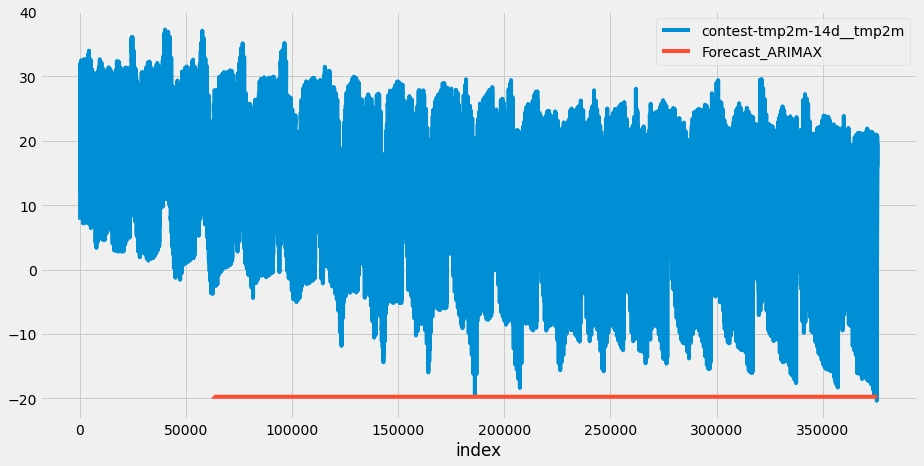

In [64]:
df_valid[["contest-tmp2m-14d__tmp2m", "Forecast_ARIMAX"]].plot(figsize=(14, 7))